## Assignment 2 - Deadline: April 14, 2024, Sun 11pm

#### DSAI 541 Spring 2024

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.bogazici.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time and no late homeworks will be accepted.


To make a pdf, this may work if you're using Jupyter notebook on browser: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu. (You can use Google Colab, but at the end you should download the ipynb notebook to submit it on Moodle.)

In [1]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import HTML
from sklearn.model_selection import train_test_split

# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

# Problem 1: MNIST with shuffled pixels (10 pts)

In class (Lecture 08.ipynb), we loaded MNIST data from Keras, normalized it, trained it and reached >96% accuracy. Your task is now <br>

**Part a)** Shuffle the pixels of all MNIST pictures in the dataset. To do this, use random numbers to come up with shuffling function that will randomize position of pixels. Once this shuffling function is defined, apply it to all MNIST pictures in the dataset. Note: Shuffling fnc should not change each time it transforms an MNIST image; pixels of all images should be shuffled the same way. <br>

**Part b)** Make a plot with MNISTplot2D(x_train[50]). The image should look like a noise, not a number since pixels are shuffled. <br>

**Part c)** Train and retrain the model in the same way we did in Lecture 08.ipynb. You should have gotten the same accuracy again around 96% (maybe %1 less). Explain why didn't the model accuracy fell significanly despite that we completely destroyed neighborhood information in the images where neighboring pixels are correlated in shade.

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define a function to shuffle the pixels of an image
def shuffle_image_pixels(image):
    # Reshape the image to a 1D array
    image_flat = image.flatten()
    # Generate a random permutation of indices
    random_indices = np.random.permutation(len(image_flat))
    # Shuffle the pixels based on the random permutation
    shuffled_image = image_flat[random_indices]
    # Reshape the shuffled image back to its original shape
    shuffled_image = shuffled_image.reshape(image.shape)
    return shuffled_image

# Apply the shuffling function to all images in the dataset
x_train_shuffled = np.array([shuffle_image_pixels(image) for image in x_train])
x_test_shuffled = np.array([shuffle_image_pixels(image) for image in x_test])

# Check the shape of the shuffled datasets
print("Shuffled training dataset shape:", x_train_shuffled.shape)
print("Shuffled testing dataset shape:", x_test_shuffled.shape)


Shuffled training dataset shape: (60000, 28, 28)
Shuffled testing dataset shape: (10000, 28, 28)


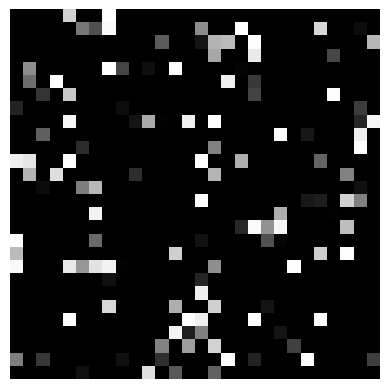

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Define the MNISTplot2D function (assuming it's defined in your code)
def MNISTplot2D(data):
    digit_image = data
    plt.imshow(digit_image, cmap='gray')
    plt.axis('off') 
    plt.show()

# Plot a shuffled MNIST image
MNISTplot2D(x_train_shuffled[50])
# Normalize data to have values between 0 and 1
# Normalization is not a must but it helps most of the times
x_train_normalized = x_train.astype('float32') / 255
x_test_normalized = x_test.astype('float32') / 255

# Flatten images to 1D vectors (28x28 pixels to 784)
x_train_1D = x_train_normalized.reshape((x_train.shape[0], -1))
x_test_1D = x_test_normalized.reshape((x_test.shape[0], -1))





# Define the number of classes
num_classes = 10

# Convert class vectors to binary class matrices
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)





C:\Users\burak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


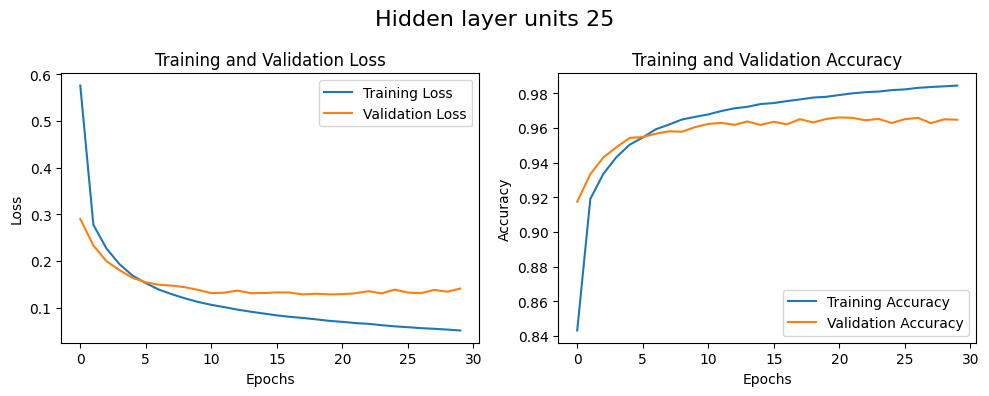

Test Loss: 14
Test Accuracy: 96.26%


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model parameters
input_size = 784  # Input size (28x28 pixels flattened to 784)
hiddenunits = 25  # Size of the hidden layer
num_classes = 10  # Number of classes (digits 0-9)

# Build the model
model = Sequential([
    Dense(hiddenunits, activation='relu', input_shape=(input_size,)),
    Dense(hiddenunits, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Normalize data to have values between 0 and 1
# Normalization is not a must but it helps most of the times
x_train_normalized = x_train.astype('float32') / 255
x_test_normalized = x_test.astype('float32') / 255

# Flatten images to 1D vectors (28x28 pixels to 784)
x_train_1D = x_train_normalized.reshape((x_train.shape[0], -1))
x_test_1D = x_test_normalized.reshape((x_test.shape[0], -1))

# Train the model
history = model.fit(x_train_1D, y_train_cat, batch_size=128, epochs=30, validation_split=0.2, verbose=0)

# Plotting the Loss and Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle(f'Hidden layer units {hiddenunits}', fontsize=16)

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_1D, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss * 100:.0f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Problem 2: Noisy MNIST (10 pts)

**Part a)** Write a function that will take an MNIST image, randomly choose 50% percent of pixels of it, then assign a random integer between [0,255]. Apply this function to all dataset to obtain noisy MNIST dataset. Note: Do this after loading the dataset `(x_train, y_train), (x_test, y_test) = mnist.load_data()` and before you normalize it. 

**Part b)** `MNISTplot2D(x_train[50])` should output noisy "3" as below.

<br>
<div>
<img src="attachment:image.png" width="300"/>
</div>
<br>


**Part c)** Now use the same code from Lecture 08.ipynb to train and retrain the model. At what value did the accuracy fall? Explain why accuracy is lower in noisy MNIST.

**Part d)** Now add ridge regression to the model in Part c) to improve the model performance. You should be getting accuracy better than that in Part c). Explain why did ridge regression improved the model.





In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define a function to add noise to a single image
def add_noise(image):
    noisy_image = np.copy(image)  # Create a copy of the image
    num_pixels = image.shape[0] * image.shape[1]  # Total number of pixels
    num_noisy_pixels = int(0.5 * num_pixels)  # 50% of the pixels
    # Choose random pixel coordinates
    noisy_indices = np.random.choice(num_pixels, num_noisy_pixels, replace=False)
    # Assign random integer between [0, 255] to selected pixels
    noisy_image.flat[noisy_indices] = np.random.randint(0, 256, size=num_noisy_pixels)
    return noisy_image

# Apply the function to all images in the dataset
x_train_noisy = np.array([add_noise(image) for image in x_train])
x_test_noisy = np.array([add_noise(image) for image in x_test])

# Normalize the noisy datasets
x_train_noisy_normalized = x_train_noisy.astype('float32') / 255
x_test_noisy_normalized = x_test_noisy.astype('float32') / 255

# Reshape the normalized datasets
x_train_noisy_1D = x_train_noisy_normalized.reshape((x_train.shape[0], -1))
x_test_noisy_1D = x_test_noisy_normalized.reshape((x_test.shape[0], -1))

# Check the shape of the noisy datasets
print("Noisy training dataset shape:", x_train_noisy_1D.shape)
print("Noisy testing dataset shape:", x_test_noisy_1D.shape)


Noisy training dataset shape: (60000, 784)
Noisy testing dataset shape: (10000, 784)


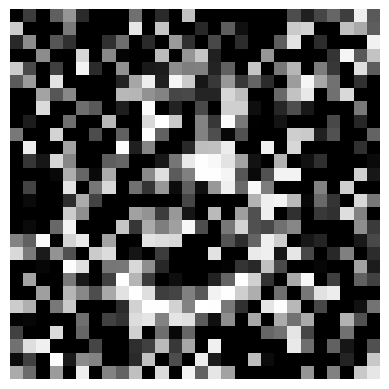

In [13]:
# Define the MNISTplot2D function
def MNISTplot2D(data):
    digit_image = data
    plt.imshow(digit_image, cmap='gray')
    plt.axis('off') 
    plt.show()

# Plot the noisy MNIST image generated from the 50th training sample
MNISTplot2D(x_train_noisy[50])


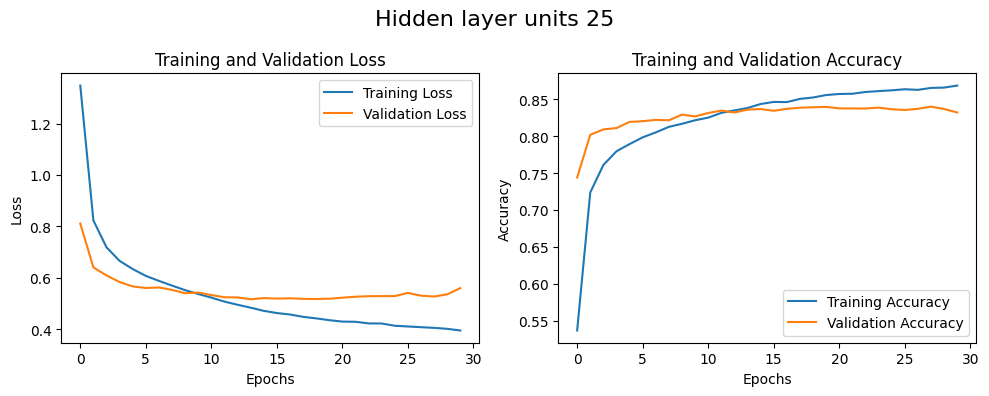

Test Loss: 0.5478
Test Accuracy: 0.8320


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define model parameters
input_size = 784  # Input size (28x28 pixels flattened to 784)
hiddenunits = 25  # Size of the hidden layer
num_classes = 10  # Number of classes (digits 0-9)
dropout_rate = 0.05

# Build the model
model = Sequential([
    Dense(hiddenunits, activation='relu', input_shape=(input_size,)),
    Dropout(dropout_rate),  # Add dropout after the first hidden layer
    Dense(hiddenunits, activation='relu'),
    Dropout(dropout_rate),  # Add dropout after the second hidden layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy_1D, y_train_cat, batch_size=128, epochs=30, validation_split=0.2, verbose=0)

# Plotting the Loss and Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle(f'Hidden layer units {hiddenunits}', fontsize=16)

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_noisy_1D, y_test_cat, verbose=0)
print(f"Test Loss: {test_loss * 100:.0f}")
print(f"Test Accuracy: {test_accuracy * 100:.0f}%")


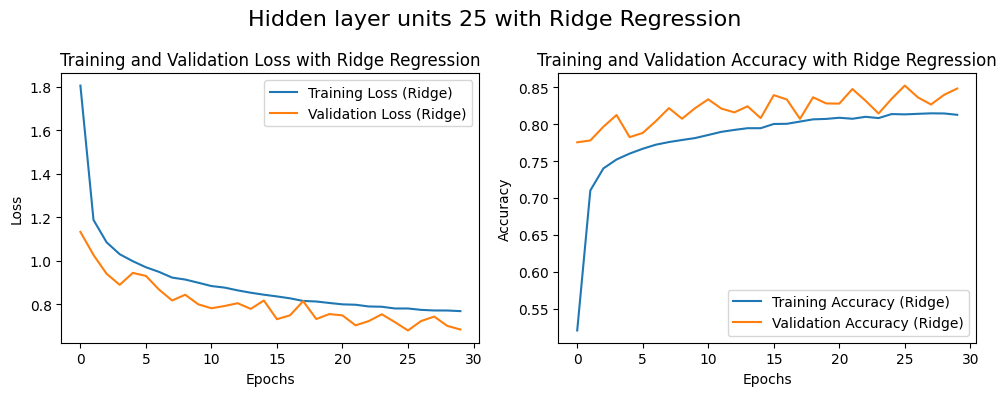

Test Loss with Ridge Regression: 0.6903
Test Accuracy with Ridge Regression: 0.8453


In [15]:
from tensorflow.keras.regularizers import l2

# Build the model with ridge regression (L2 regularization)
model_ridge = Sequential([
    Dense(hiddenunits, activation='relu', input_shape=(input_size,), kernel_regularizer=l2(0.01)),
    Dropout(dropout_rate),  # Add dropout after the first hidden layer
    Dense(hiddenunits, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(dropout_rate),  # Add dropout after the second hidden layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_ridge.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_ridge = model_ridge.fit(x_train_noisy_1D, y_train_cat, batch_size=128, epochs=30, validation_split=0.2, verbose=0)

# Plotting the Loss and Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_ridge.history['loss'], label='Training Loss (Ridge)')
plt.plot(history_ridge.history['val_loss'], label='Validation Loss (Ridge)')
plt.title('Training and Validation Loss with Ridge Regression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_ridge.history['accuracy'], label='Training Accuracy (Ridge)')
plt.plot(history_ridge.history['val_accuracy'], label='Validation Accuracy (Ridge)')
plt.title('Training and Validation Accuracy with Ridge Regression')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle(f'Hidden layer units {hiddenunits} with Ridge Regression', fontsize=16)

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
test_loss_ridge, test_accuracy_ridge = model_ridge.evaluate(x_test_noisy_1D, y_test_cat, verbose=0)
print(f"Test Loss with Ridge Regression: {test_loss_ridge * 100:.0f}")
print(f"Test Accuracy with Ridge Regression: {test_accuracy_ridge * 100:.0f}%")


# Problem 3: Jena weather dataset (20 pts)

Load Jena weather dataset. Do data cleaning (filling missing values, interpolation etc) just as we did in class. 

**Part a)** We will only use the "T (degC)" column. Resample the dataset so that it'll have one data point for each day and that one data point will be the the maximum temperature of that day.

**Part b)** Train and retrain a model by using RNNs (SimpleRNN, LSTM, GRU etc) on the "T (degC)" column to estimate the next data point (seq2vec with 1 output).

**Part c)** Forecast the max temperature of the five days after the end of train dataset. Since your model will be predicting only the next day's max temperature, you should use iterative approach as we did in class to find the max temperature of 5 days into the future. 

**Part d)** Plot train and validation sets and on the same figure also plot the predictions as we did in class. Try to get a good prediction, so try different model architectures. 